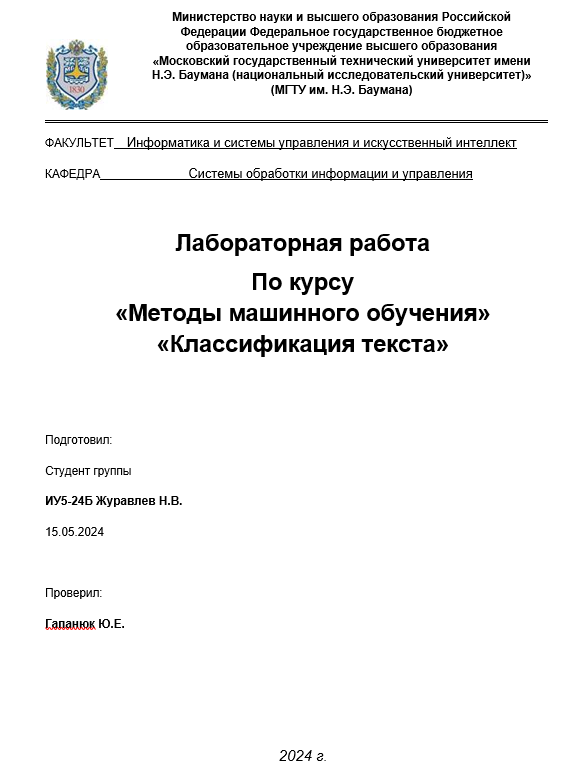

Задание:
Для произвольного набора данных, предназначенного для классификации текстов, решите задачу классификации текста двумя способами:
1.   На основе CountVectorizer или TfidfVectorizer.
2.   На основе моделей word2vec или Glove или fastText.
3.   Сравните качество полученных моделей.

Для поиска наборов данных в поисковой системе можно использовать ключевые слова "datasets for text classification".

Был выбран датасет [архив новостей bbc и их категории](https://www.kaggle.com/datasets/hgultekin/bbcnewsarchive)

In [2]:
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from scipy import stats
from IPython.display import Image
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
import seaborn as sns
import matplotlib.pyplot as plt
import gensim
from gensim.models import word2vec
import nltk.data # библиотека Natural Language Toolkit
import re   # библиотека для регулярных выражений
from bs4 import BeautifulSoup # библиотека для парсинга xml
from nltk.corpus import stopwords # стоп-слова из NLTK
from nltk.tokenize import sent_tokenize, RegexpTokenizer  # токенизаторы из NLTK
import re
from typing import Dict, Tuple
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from nltk import WordPunctTokenizer
from nltk.corpus import stopwords
import nltk

%matplotlib inline
sns.set(style="ticks")

def accuracy_score_for_classes(
    y_true: np.ndarray,
    y_pred: np.ndarray) -> Dict[int, float]:
    """
    Вычисление метрики accuracy для каждого класса
    y_true - истинные значения классов
    y_pred - предсказанные значения классов
    Возвращает словарь: ключ - метка класса,
    значение - Accuracy для данного класса
    """
    # Для удобства фильтрации сформируем Pandas DataFrame
    d = {'t': y_true, 'p': y_pred}
    df = pd.DataFrame(data=d)
    # Метки классов
    classes = np.unique(y_true)
    # Результирующий словарь
    res = dict()
    # Перебор меток классов
    for c in classes:
        # отфильтруем данные, которые соответствуют
        # текущей метке класса в истинных значениях
        temp_data_flt = df[df['t']==c]
        # расчет accuracy для заданной метки класса
        temp_acc = accuracy_score(
            temp_data_flt['t'].values,
            temp_data_flt['p'].values)
        # сохранение результата в словарь
        res[c] = temp_acc
    return res

def print_accuracy_score_for_classes(
    y_true: np.ndarray,
    y_pred: np.ndarray):
    """
    Вывод метрики accuracy для каждого класса
    """
    accs = accuracy_score_for_classes(y_true, y_pred)
    if len(accs)>0:
        print('Метка \t Accuracy')
    for i in accs:
        print('{} \t {}'.format(i, accs[i]))

# Загрузка данных
imdb_df = pd.read_csv("bbc-news-data.csv", delimiter='	')
imdb_df = imdb_df.drop("filename", axis=1)
imdb_df = imdb_df.drop("title", axis=1)
imdb_df

,category,content
0,business,Quarterly profits at US media giant TimeWarne...
1,business,The dollar has hit its highest level against ...
2,business,The owners of embattled Russian oil giant Yuk...
3,business,British Airways has blamed high fuel prices f...
4,business,Shares in UK drinks and food firm Allied Dome...
...,...,...
2220,tech,BT is introducing two initiatives to help bea...
2221,tech,Computer users across the world continue to i...
2222,tech,A new European directive could put software w...
2223,tech,The man making sure US computer networks are ...


На основе CountVectorizer

In [3]:
# Сформируем общий словарь для обучения моделей из обучающей и тестовой выборки
vocab_list = imdb_df['content'].tolist()

vocabVect = CountVectorizer()
vocabVect.fit(vocab_list)
corpusVocab = vocabVect.vocabulary_
print('Количество сформированных признаков - {}'.format(len(corpusVocab)))

ncv = CountVectorizer(ngram_range=(1,3))
ngram_features = ncv.fit_transform(vocab_list)

tfidfv = TfidfVectorizer(ngram_range=(1,3))
tfidf_ngram_features = tfidfv.fit_transform(vocab_list)

def VectorizeAndClassify(vectorizers_list, classifiers_list):
    for v in vectorizers_list:
        for c in classifiers_list:
            pipeline1 = Pipeline([("vectorizer", v), ("classifier", c)])
            score = cross_val_score(pipeline1, imdb_df['content'], imdb_df['category'], scoring='accuracy', cv=3).mean()
            print('Векторизация - {}'.format(v))
            print('Модель для классификации - {}'.format(c))
            print('Accuracy = {}'.format(score))
            print('===========================')

vectorizers_list = [CountVectorizer(vocabulary = corpusVocab)]
classifiers_list = [LogisticRegression(C=3.0)]
VectorizeAndClassify(vectorizers_list, classifiers_list)

Количество сформированных признаков - 29275


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Векторизация - CountVectorizer(vocabulary={'00': 0, '000': 1, '0001': 2, '000bn': 3, '000m': 4,
                            '000s': 5, '000th': 6, '001': 7, '001and': 8,
                            '001st': 9, '004': 10, '0051': 11, '007': 12,
                            '01': 13, '0100': 14, '011': 15, '0130': 16,
                            '02': 17, '0200': 18, '0227': 19, '028': 20,
                            '03': 21, '0300': 22, '033': 23, '037': 24,
                            '03bn': 25, '04': 26, '0400': 27, '041': 28,
                            '04bn': 29, ...})
Модель для классификации - LogisticRegression(C=3.0)
Accuracy = 0.9537201736804518


На основе моделей word2vec

In [4]:
X_train, X_test, y_train, y_test = train_test_split(imdb_df['content'], imdb_df['category'], test_size=0.5, random_state=1)

nltk.download('stopwords')

# Подготовим корпус
corpus = []
stop_words = stopwords.words('english')
tok = WordPunctTokenizer()
for line in imdb_df['content'].values:
    line1 = line.strip().lower()
    line1 = re.sub("[^a-zA-Z]"," ", line1)
    text_tok = tok.tokenize(line1)
    text_tok1 = [w for w in text_tok if not w in stop_words]
    corpus.append(text_tok1)

model = word2vec.Word2Vec(corpus, workers=4, min_count=10, window=10, sample=1e-3)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
def sentiment(v, c):
    model = Pipeline(
        [("vectorizer", v),
         ("classifier", c)])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print_accuracy_score_for_classes(y_test, y_pred)

class EmbeddingVectorizer(object):
    '''
    Для текста усредним вектора входящих в него слов
    '''
    def __init__(self, model):
        self.model = model
        self.size = model.vector_size

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([np.mean(
            [self.model[w] for w in words if w in self.model]
            or [np.zeros(self.size)], axis=0)
            for words in X])

def accuracy_score_for_classes(
    y_true: np.ndarray,
    y_pred: np.ndarray) -> Dict[int, float]:
    """
    Вычисление метрики accuracy для каждого класса
    y_true - истинные значения классов
    y_pred - предсказанные значения классов
    Возвращает словарь: ключ - метка класса,
    значение - Accuracy для данного класса
    """
    # Для удобства фильтрации сформируем Pandas DataFrame
    d = {'t': y_true, 'p': y_pred}
    df = pd.DataFrame(data=d)
    # Метки классов
    classes = np.unique(y_true.apply(str))
    # Результирующий словарь
    res = dict()
    # Перебор меток классов
    for c in classes:
        # отфильтруем данные, которые соответствуют
        # текущей метке класса в истинных значениях
        temp_data_flt = df[df['t']==c]
        # расчет accuracy для заданной метки класса
        temp_acc = accuracy_score(
            temp_data_flt['t'].values,
            temp_data_flt['p'].values)
        # сохранение результата в словарь
        res[c] = temp_acc
    return res

def print_accuracy_score_for_classes(
    y_true: np.ndarray,
    y_pred: np.ndarray):
    """
    Вывод метрики accuracy для каждого класса
    """
    accs = accuracy_score_for_classes(y_true, y_pred)
    if len(accs)>0:
        print('Метка \t Accuracy')
    for i in accs:
        print('{} \t {}'.format(i, accs[i]))

sentiment(EmbeddingVectorizer(model.wv), LogisticRegression(C=5.0))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Метка 	 Accuracy
business 	 0.6349206349206349
entertainment 	 0.0
politics 	 0.046511627906976744
sport 	 0.680327868852459
tech 	 0.18811881188118812


Лучше точность у CountVectorizer.Его точность может быть выше, чем у word2vec по нескольким причинам:

Задача классификации текста: В некоторых задачах классификации текста, особенно если важны частота встречаемости слов, CountVectorizer может показать более высокую точность, так как он учитывает частоту встречаемости слов в документах.

Размер датасета: Word2vec может показывать худшую точность на небольших датасетах из-за ограниченной информации для обучения векторных представлений слов.